In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import joblib

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
import joblib

In [43]:
df = pd.read_csv("resume_job_matching_dataset.csv")
job_col = "job_description"
resume_col = "resume"
target_col = "match_score"
X_job = df[job_col].astype(str)
X_resume = df[resume_col].astype(str)
y = df[target_col]
class ColumnExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, col):
        self.col = col
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.col]
job_vectorizer = ('job_tfidf', TfidfVectorizer(max_features=5000), job_col)
resume_vectorizer = ('resume_tfidf', TfidfVectorizer(max_features=5000), resume_col)
pipeline = Pipeline([
    ('features', FeatureUnion([
        ('job_tfidf', TfidfVectorizer(max_features=5000, analyzer='word')),
        ('resume_tfidf', TfidfVectorizer(max_features=5000, analyzer='word'))
    ])),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])
X_combined = list(zip(X_job, X_resume))
df_combined = pd.DataFrame(X_combined, columns=[job_col, resume_col])

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(df_combined, y, test_size=0.2, random_state=42)

# Define union properly with separate columns
pipeline = Pipeline([
    ('features', FeatureUnion([
        ('job_tfidf', Pipeline([
            ('extract', ColumnExtractor(job_col)),
            ('tfidf', TfidfVectorizer(max_features=5000))
        ])),
        ('resume_tfidf', Pipeline([
            ('extract', ColumnExtractor(resume_col)),
            ('tfidf', TfidfVectorizer(max_features=5000))
        ]))
    ])),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 6. Fit model
pipeline.fit(X_train, y_train)

# 7. Predictions
y_pred = pipeline.predict(X_test)

# 8. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# 9. Save the trained model
joblib.dump(pipeline, "resume_job_match_model.pkl")
print("Model saved as resume_job_match_model.pkl")


Mean Squared Error: 0.3453
R² Score: 0.7442
Model saved as resume_job_match_model.pkl


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
import joblib


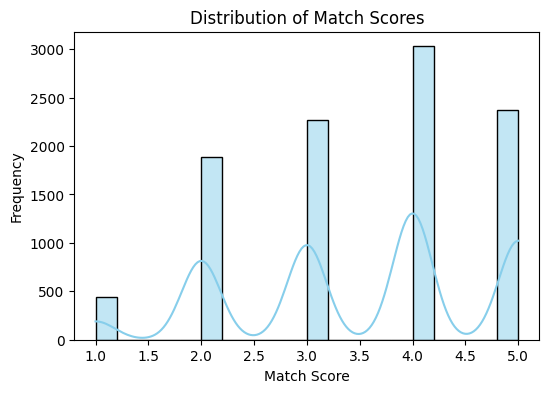

In [45]:
plt.figure(figsize=(6,4))
sns.histplot(df['match_score'], kde=True, bins=20, color="skyblue")
plt.title("Distribution of Match Scores")
plt.xlabel("Match Score")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Job Description Word Cloud')

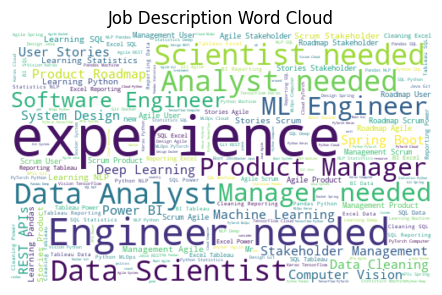

In [46]:
job_text = " ".join(df['job_description'].astype(str))
resume_text = " ".join(df['resume'].astype(str))

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
wc_job = WordCloud(width=500, height=300, background_color="white").generate(job_text)
plt.imshow(wc_job, interpolation="bilinear")
plt.axis("off")
plt.title("Job Description Word Cloud")


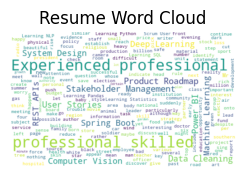

In [47]:
plt.subplot(1, 2, 2)
wc_resume = WordCloud(width=500, height=300, background_color="white").generate(resume_text)
plt.imshow(wc_resume, interpolation="bilinear")
plt.axis("off")
plt.title("Resume Word Cloud")
plt.show()

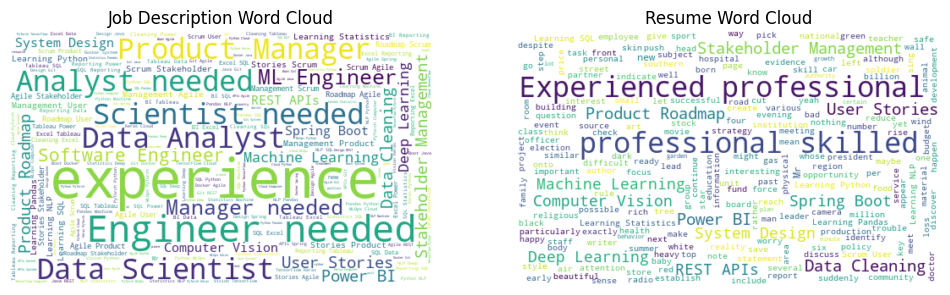

In [48]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
wc_job = WordCloud(width=500, height=300, background_color="white").generate(job_text)
plt.imshow(wc_job, interpolation="bilinear")
plt.axis("off")
plt.title("Job Description Word Cloud")

plt.subplot(1, 2, 2)
wc_resume = WordCloud(width=500, height=300, background_color="white").generate(resume_text)
plt.imshow(wc_resume, interpolation="bilinear")
plt.axis("off")
plt.title("Resume Word Cloud")
plt.show()


In [49]:
def top_words(text_series, top_n=10):
    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    X = vectorizer.fit_transform(text_series)
    words = vectorizer.get_feature_names_out()
    sums = X.sum(axis=0)
    word_freq = [(word, sums[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(word_freq, key=lambda x: x[1], reverse=True)[:top_n]

top_job_words = top_words(df['job_description'])
top_resume_words = top_words(df['resume'])

/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_38100/674672302.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Top Words in Job Descriptions')

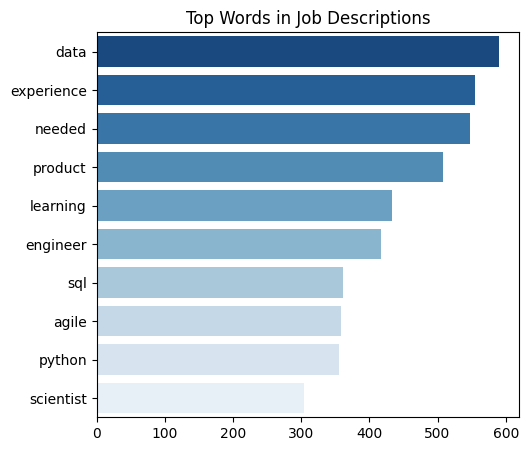

In [50]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.barplot(x=[w[1] for w in top_job_words], y=[w[0] for w in top_job_words], palette="Blues_r")
plt.title("Top Words in Job Descriptions")


/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_38100/3839409920.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




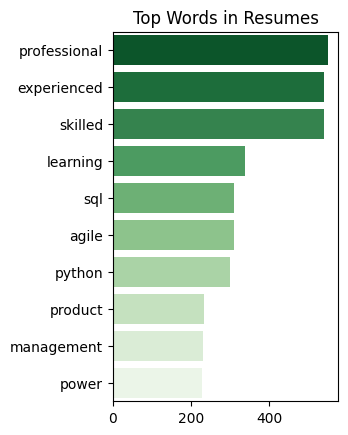

In [51]:
plt.subplot(1, 2, 2)
sns.barplot(x=[w[1] for w in top_resume_words], y=[w[0] for w in top_resume_words], palette="Greens_r")
plt.title("Top Words in Resumes")
plt.show()

In [52]:
job_col = "job_description"
resume_col = "resume"
target_col = "match_score"

class ColumnExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, col):
        self.col = col
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.col]

pipeline = Pipeline([
    ('features', FeatureUnion([
        ('job_tfidf', Pipeline([
            ('extract', ColumnExtractor(job_col)),
            ('tfidf', TfidfVectorizer(max_features=500))
        ])),
        ('resume_tfidf', Pipeline([
            ('extract', ColumnExtractor(resume_col)),
            ('tfidf', TfidfVectorizer(max_features=500))
        ]))
    ])),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

X_combined = pd.DataFrame(zip(df[job_col], df[resume_col]), columns=[job_col, resume_col])
X_train, X_test, y_train, y_test = train_test_split(X_combined, df[target_col], test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}, R²: {r2:.4f}")

MSE: 0.3279, R²: 0.7571


In [53]:
job_features = pipeline.named_steps['features'].transformer_list[0][1].named_steps['tfidf'].get_feature_names_out()
resume_features = pipeline.named_steps['features'].transformer_list[1][1].named_steps['tfidf'].get_feature_names_out()
all_features = [f"job_{f}" for f in job_features] + [f"resume_{f}" for f in resume_features]

In [54]:
importances = pipeline.named_steps['model'].feature_importances_

/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_38100/3631364391.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




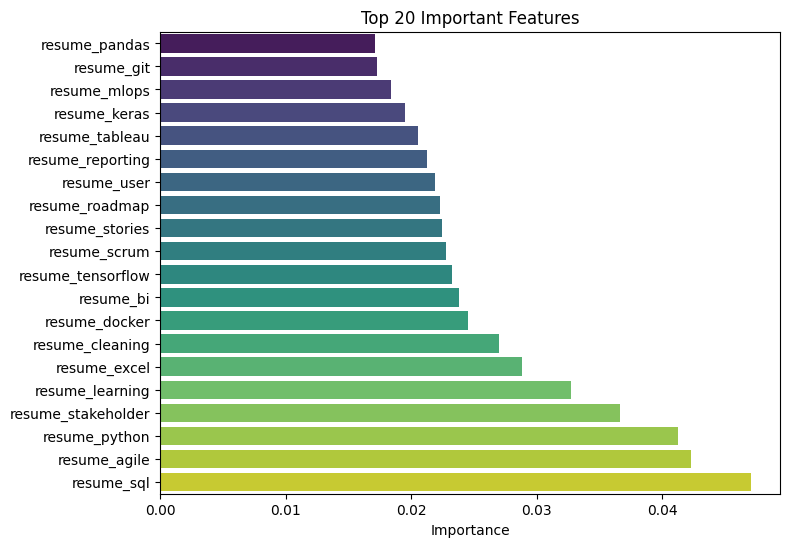

In [55]:
indices = importances.argsort()[-20:]
plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices], y=[all_features[i] for i in indices], palette="viridis")
plt.title("Top 20 Important Features")
plt.xlabel("Importance")
plt.show()

In [56]:
df.dropna(subset=['resume', 'job_description', 'match_score'], inplace=True)

In [57]:
df['resume_length'] = df['resume'].apply(lambda x: len(str(x).split()))
df['job_length'] = df['job_description'].apply(lambda x: len(str(x).split()))


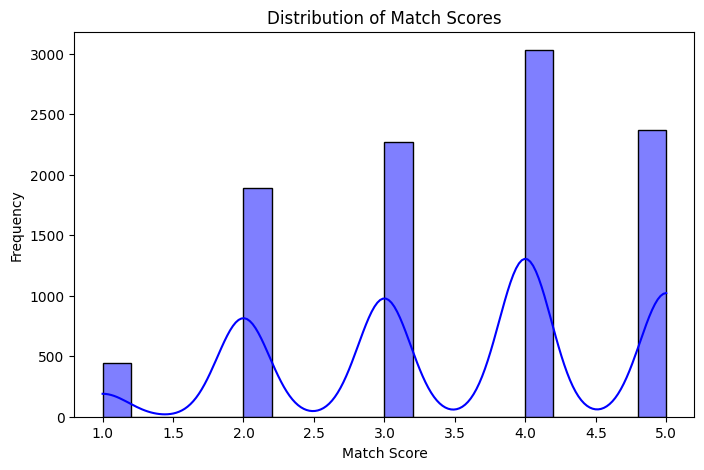

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(df['match_score'], kde=True, bins=20, color='blue')
plt.title("Distribution of Match Scores")
plt.xlabel("Match Score")
plt.ylabel("Frequency")
plt.show()

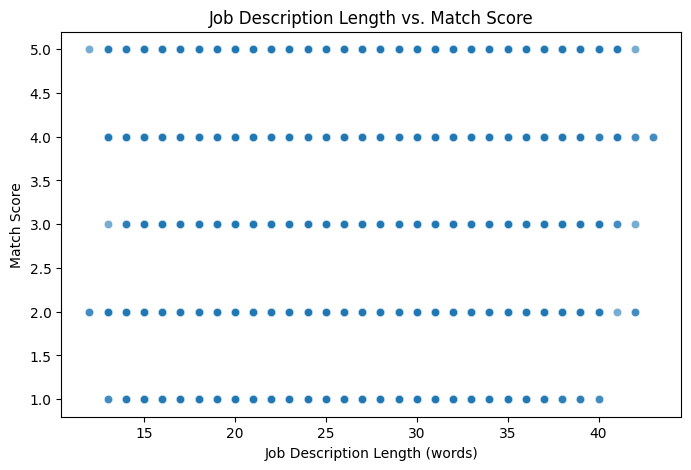

In [59]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='job_length', y='match_score', data=df, alpha=0.6)
plt.title("Job Description Length vs. Match Score")
plt.xlabel("Job Description Length (words)")
plt.ylabel("Match Score")
plt.show()


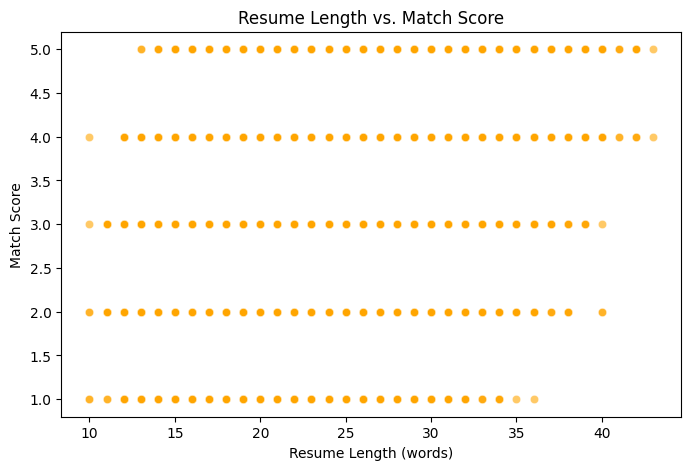

In [60]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='resume_length', y='match_score', data=df, alpha=0.6, color='orange')
plt.title("Resume Length vs. Match Score")
plt.xlabel("Resume Length (words)")
plt.ylabel("Match Score")
plt.show()

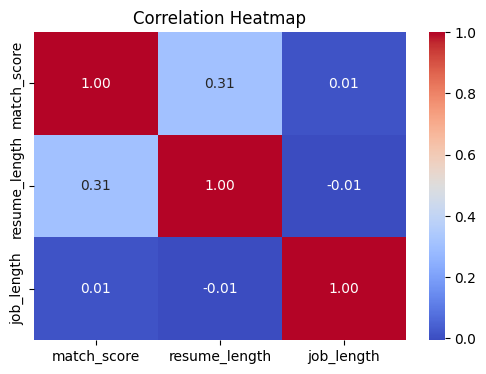

In [61]:
plt.figure(figsize=(6,4))
corr = df[['match_score', 'resume_length', 'job_length']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

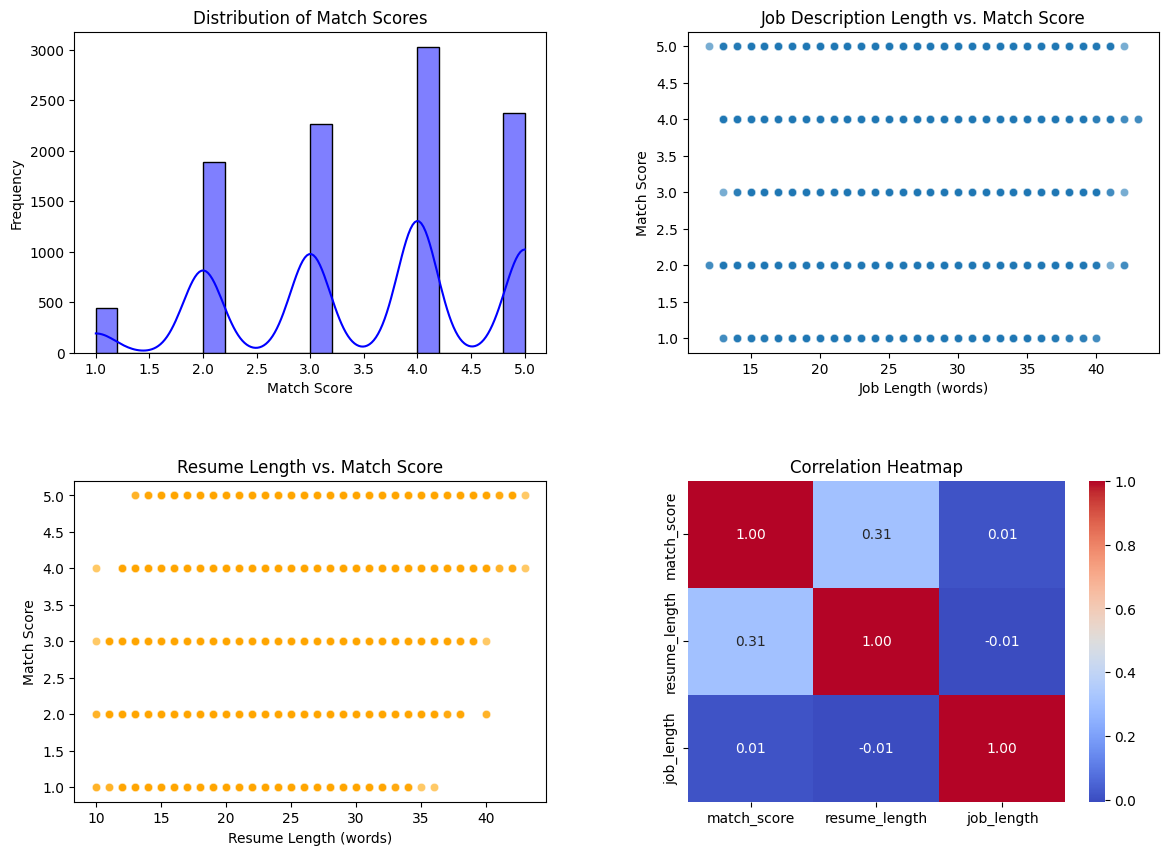

In [62]:
df.dropna(subset=['resume', 'job_description', 'match_score'], inplace=True)
df['resume_length'] = df['resume'].apply(lambda x: len(str(x).split()))
df['job_length'] = df['job_description'].apply(lambda x: len(str(x).split()))
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
sns.histplot(df['match_score'], kde=True, bins=20, color='blue', ax=axes[0,0])
axes[0,0].set_title("Distribution of Match Scores")
axes[0,0].set_xlabel("Match Score")
axes[0,0].set_ylabel("Frequency")
sns.scatterplot(x='job_length', y='match_score', data=df, alpha=0.6, ax=axes[0,1])
axes[0,1].set_title("Job Description Length vs. Match Score")
axes[0,1].set_xlabel("Job Length (words)")
axes[0,1].set_ylabel("Match Score")
sns.scatterplot(x='resume_length', y='match_score', data=df, alpha=0.6, color='orange', ax=axes[1,0])
axes[1,0].set_title("Resume Length vs. Match Score")
axes[1,0].set_xlabel("Resume Length (words)")
axes[1,0].set_ylabel("Match Score")
corr = df[['match_score', 'resume_length', 'job_length']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1,1])
axes[1,1].set_title("Correlation Heatmap")
plt.show()

In [63]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [64]:
!pip install nbformat notebook


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [65]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import nbformat


In [68]:
df.dropna(subset=['resume', 'job_description', 'match_score'], inplace=True)

# Feature engineering
df['resume_length'] = df['resume'].apply(lambda x: len(str(x).split()))
df['job_length'] = df['job_description'].apply(lambda x: len(str(x).split()))

# Create 2x2 subplot dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Distribution of Match Scores",
        "Job Description Length vs. Match Score",
        "Resume Length vs. Match Score",
        "Correlation Heatmap"
    ),
    specs=[[{}, {}], [{}, {}]]
)

# 1. Distribution of Match Scores
hist_fig = px.histogram(df, x="match_score", nbins=20, marginal="box", color_discrete_sequence=["blue"])
for trace in hist_fig.data:
    fig.add_trace(trace, row=1, col=1)

# 2. Job Length vs Match Score
scatter_job = px.scatter(df, x="job_length", y="match_score", opacity=0.6, color_discrete_sequence=["green"])
for trace in scatter_job.data:
    fig.add_trace(trace, row=1, col=2)

# 3. Resume Length vs Match Score
scatter_resume = px.scatter(df, x="resume_length", y="match_score", opacity=0.6, color_discrete_sequence=["orange"])
for trace in scatter_resume.data:
    fig.add_trace(trace, row=2, col=1)

# 4. Correlation Heatmap
corr = df[['match_score', 'resume_length', 'job_length']].corr()
heatmap = go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale="RdBu",
    zmin=-1, zmax=1,
    text=corr.round(2).values,
    texttemplate="%{text}"
)
fig.add_trace(heatmap, row=2, col=2)

# Update layout
fig.update_layout(
    height=800,
    width=1000,
    title_text="Interactive Resume-Job Matching Dashboard",
    showlegend=False
)

import plotly.io as pio
pio.renderers.default = "browser"  # Forces opening in default browser
fig.write_html("dashboard.html", auto_open=True)
